In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_palette('Accent')
sns.set_style('darkgrid')

In [2]:
# Função para plotagem de gráfico 
def plotar(x, y, dataset, titulo, titulo_x, titulo_y):
    fig = sns.lineplot(x = x, y = y, data = dataset);

    fig.figure.set_size_inches(12,6)

    fig.set_title(titulo,loc = 'left', fontsize = 18)

    fig.set_xlabel(titulo_x, fontsize = 14)

    fig.set_ylabel(titulo_y, fontsize = 14)

    


In [3]:
# Função para plotar gráficos de Comparação
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.Figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 12, loc = 'left')
    sns.lineplot(x= x, y= y1, data = dataset )

    plt.subplot(3,1,2)
    sns.lineplot(x= x, y= y2, data = dataset )

    plt.subplot(3,1,3)
    sns.lineplot(x= x, y= y3, data = dataset );

## **Alucar - Análise de Vendas**

Pré visualizando os dados da Base Alucar

In [4]:
pd.read_csv('alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Armazenando os dados em uma variável (DataFrame) para manipular posteriormente

In [5]:
alucar = pd.read_csv('alucar.csv')

Fazendo o Head para que tenha noção dos dados contidos na base

In [6]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Verificando o shape do DataFrame

In [7]:
alucar.shape

(24, 2)

Verificando a existencia de Dados Nulos na base

In [8]:
alucar.isnull().sum()

mes       0
vendas    0
dtype: int64

Verificando o tipo de Dados

In [9]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

Como quero fazer uma análise de série temporal, terei que converter o compo mes para o formato de Data

In [10]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Verificando o comportamento da Vendas ao longo do Tempo

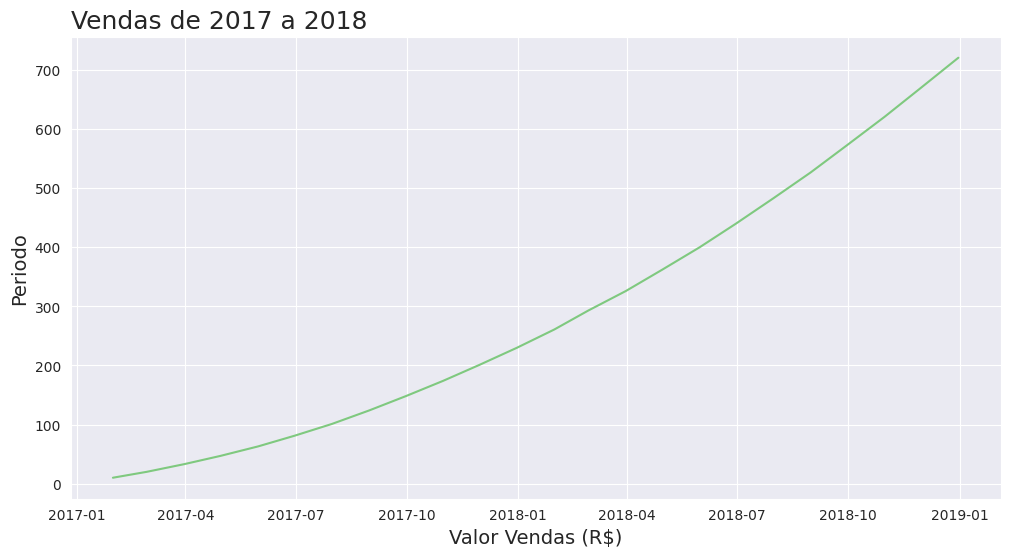

In [11]:
plotar('mes', 'vendas', alucar, 'Vendas de 2017 a 2018', 'Valor Vendas (R$)', 'Periodo' )

Decompondo as Vendas

In [12]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


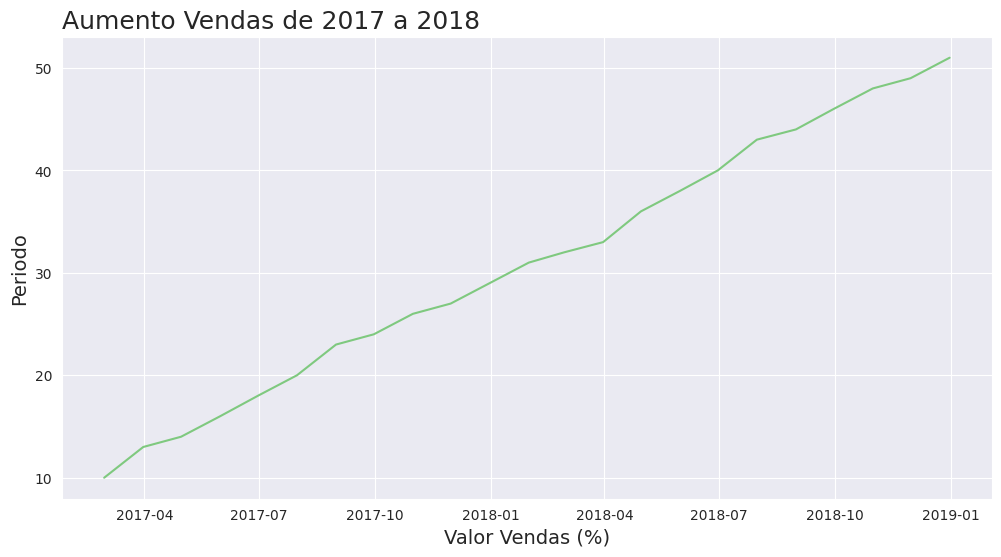

In [13]:
plotar('mes', 'aumento', alucar, 'Aumento Vendas de 2017 a 2018', 'Valor Vendas (%)', 'Periodo')

Verificando Aceleração das Vendas

In [14]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head(3)

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0


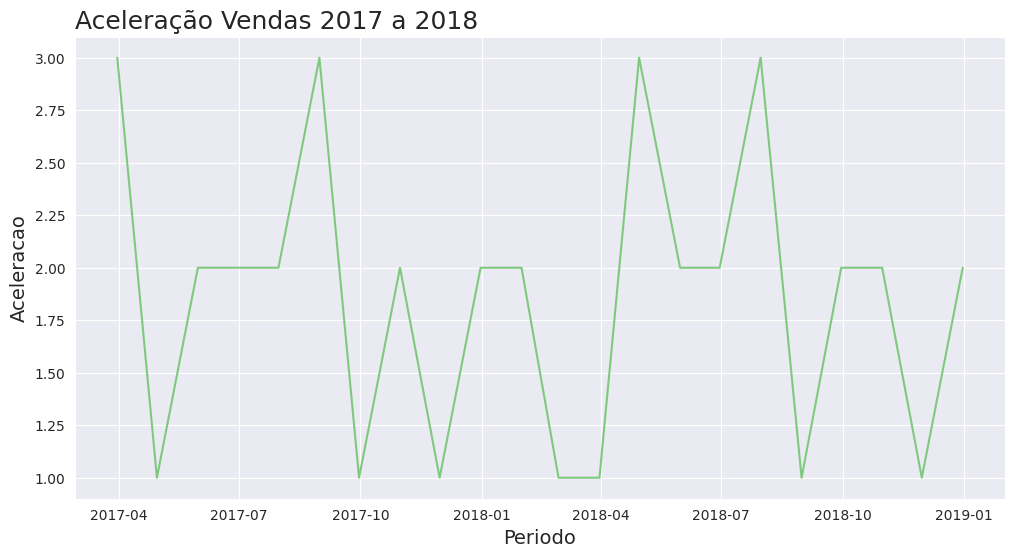

In [15]:
plotar('mes', 'aceleracao', alucar, 'Aceleração Vendas 2017 a 2018', 'Periodo', 'Aceleracao', )

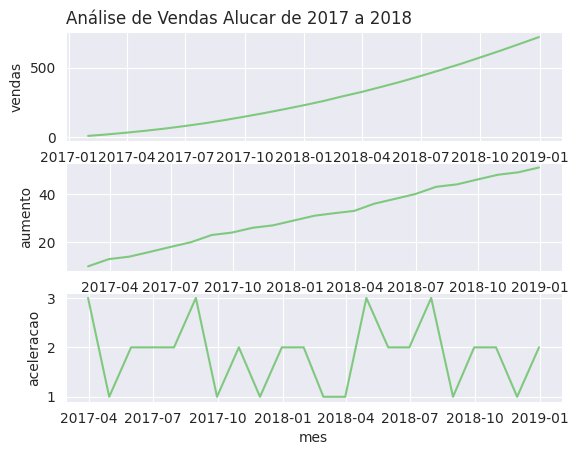

In [16]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas Alucar de 2017 a 2018')

Veriricando autocorrelação da Vendas

In [17]:
# Método do Pandas que faz a análise de autocorrelação
from pandas.plotting import autocorrelation_plot

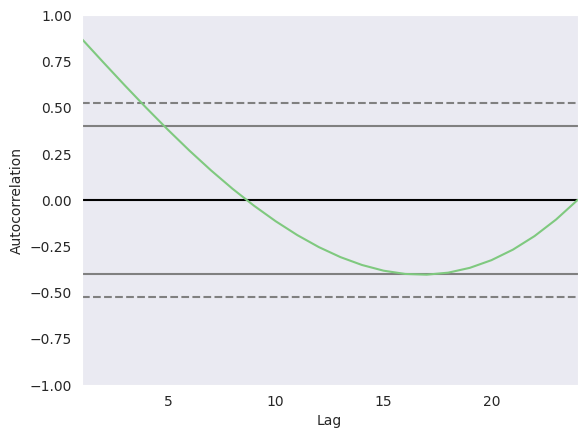

In [18]:
# Verificando Auto Correlação das Vendas
ax = plt.Figure(figsize=(12,6))
ax.suptitle('Correlação da Vendas', fontsize = 10)
autocorrelation_plot(alucar['vendas'])
ax = ax

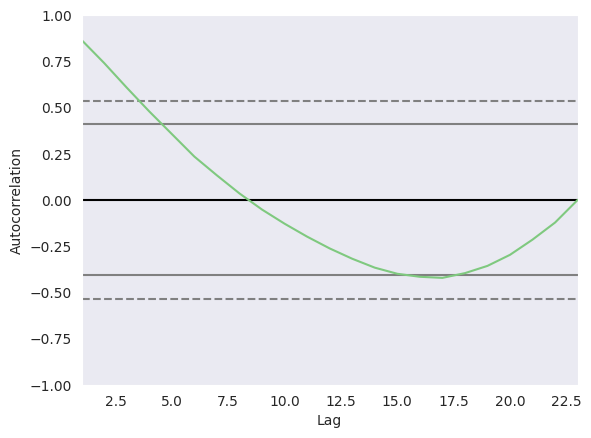

In [19]:
# Verificando Auto Correlação do Aumento
ax = plt.Figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento', fontsize = 10)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

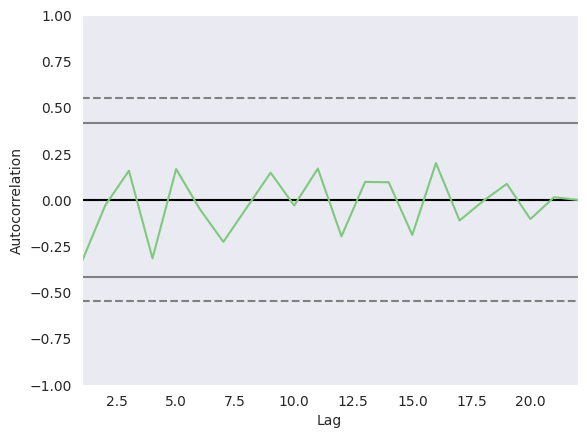

In [20]:
# Verificando Auto Correlação da Aceleração
ax = plt.Figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 10)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

## **Alucar Analisando assinantes**

In [21]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [22]:
# Verificando dimensões do DataFrame
assinantes.shape

(24, 2)

In [23]:
# Verificando existencia de dados Nulos
assinantes.isnull().sum()

mes           0
assinantes    0
dtype: int64

In [24]:
# Verificando tipos dos Dados
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [25]:
# como mes não está no formato de data, terei que realizar a conversão
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [26]:
# Verificando aumento e aceleração da Vendas da Revista
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [27]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


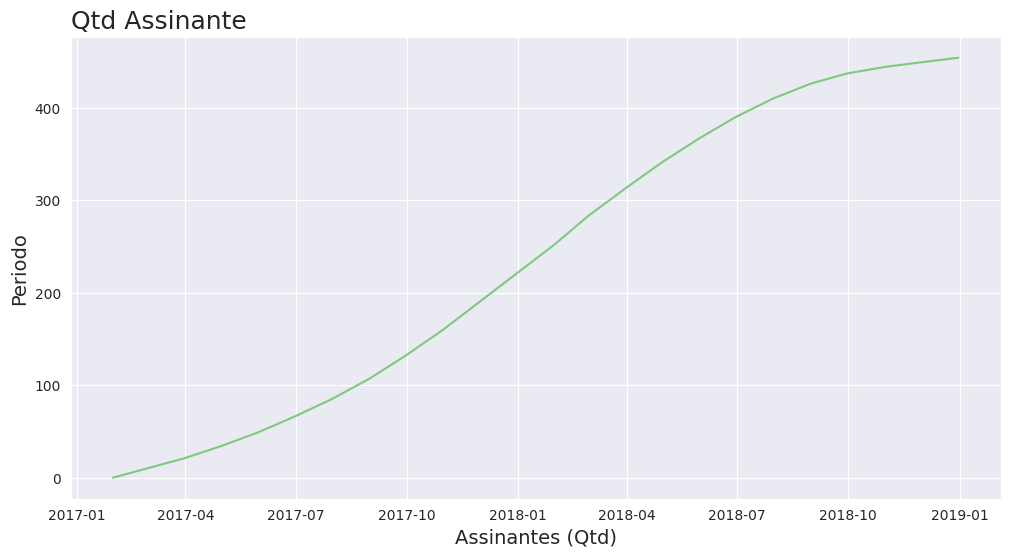

In [28]:
# Agora que já tennho o DataFrame pronto, posso gerar os gráficos para análise

plotar('mes', 'assinantes', assinantes, 'Qtd Assinante', 'Assinantes (Qtd)', 'Periodo')

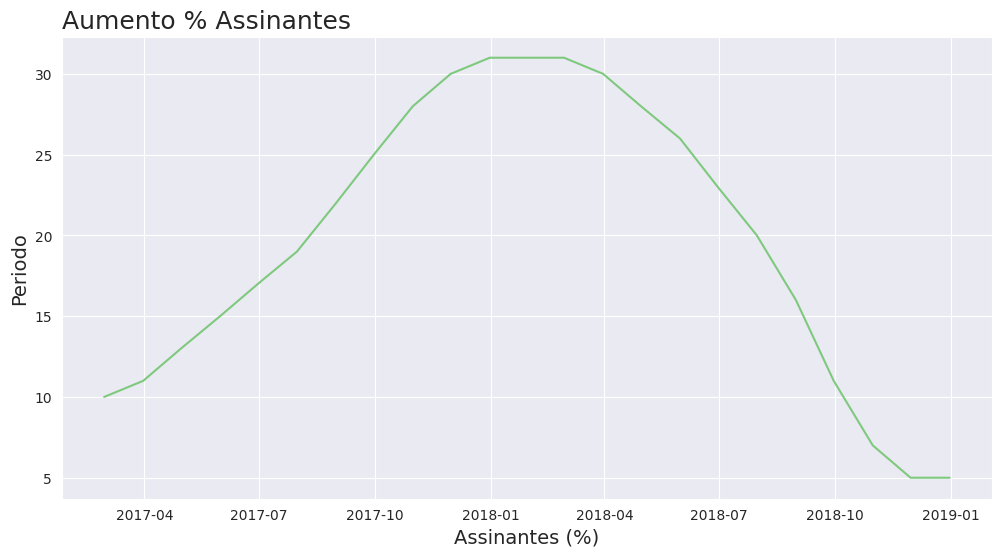

In [29]:
# Agora que já tennho o DataFrame pronto, posso gerar os gráficos para análise
# A
plotar('mes', 'aumento', assinantes, 'Aumento % Assinantes', 'Assinantes (%)', 'Periodo')

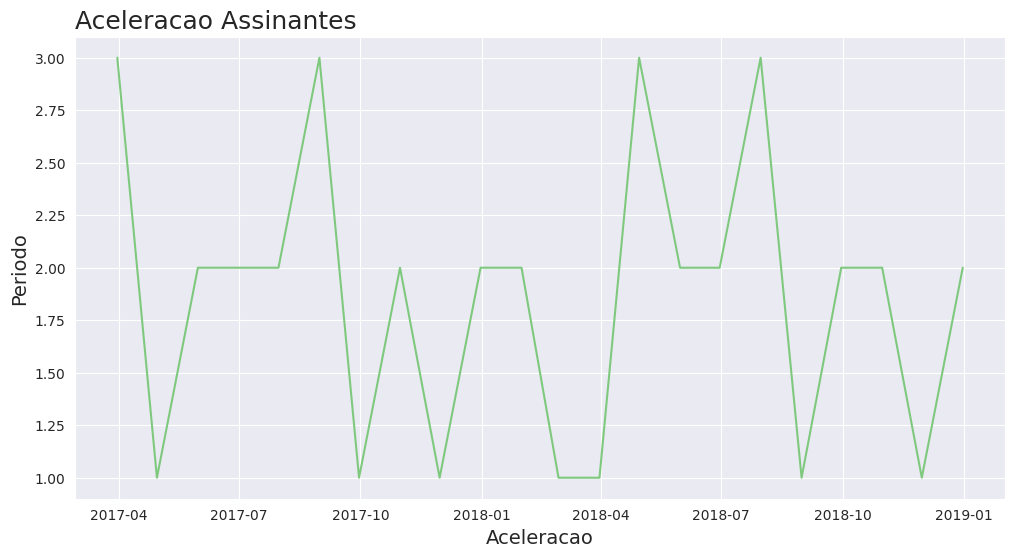

In [30]:
plotar('mes', 'aceleracao', alucar, 'Aceleracao Assinantes', 'Aceleracao', 'Periodo')

## **Verificando dados de Chocolate**

In [31]:
# Carregando os dados
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [32]:
# Verificar o tipo de Dados
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [33]:
# Alterar campo mes para o formato de data
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [34]:
# Verificando a existencia de Dados vazios
chocolura.isnull().sum()

mes       0
vendas    0
dtype: int64

In [35]:
# Decomposição da série (Aumento e Aceleração)
# Aumento
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura.head(2)


,mes,vendas,aumento
0,2017-01-01,210,NaN
1,2017-02-01,185,-25.0


In [36]:
# Aceleração
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head(3)

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0


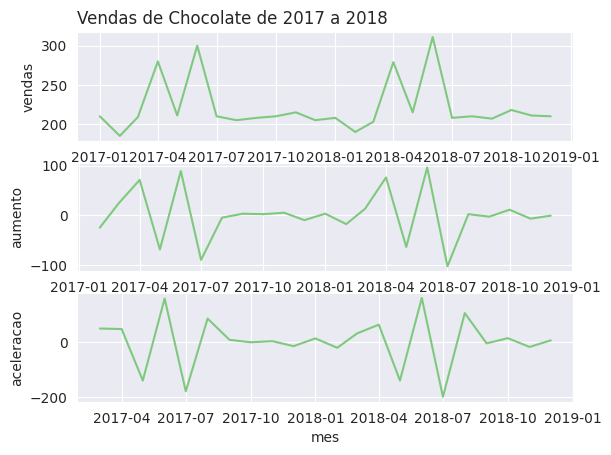

In [37]:
# plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de Vendas Alucar de 2017 a 2018')
# Gerando gráficos para análise da série temporal
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Vendas de Chocolate de 2017 a 2018' )

### **Analisando Vendas por dia**

Agora que já vimos que existe uma sazonalidade nos dados, vamos aprofundar para entender melhor o que temos em mãos

In [38]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head(2)

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48


In [39]:
# Verificando tipo de Dados
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [40]:
# Alterando campo Dia para Datetime
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [41]:
# Verificando existencia de dados nulos
vendas_por_dia.isnull().sum()

dia       0
vendas    0
dtype: int64

In [42]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia.head()

,dia,vendas,aumento
0,2018-10-01,50,NaN
1,2018-10-02,48,-2.0
2,2018-10-03,56,8.0
3,2018-10-04,50,-6.0
4,2018-10-05,51,1.0


In [43]:
# Aceleração
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head(3)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0


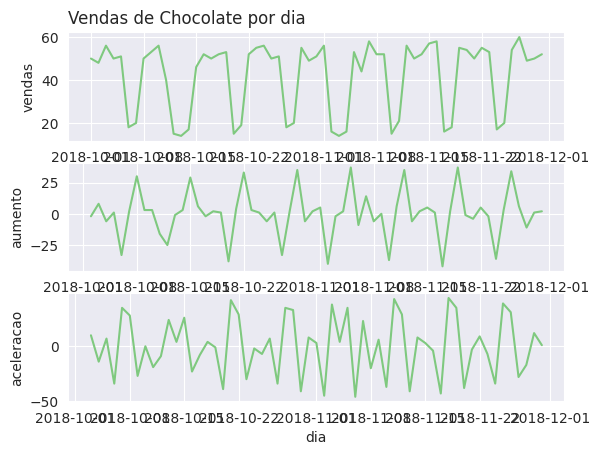

In [44]:
plot_comparacao('dia', 'vendas','aumento', 'aceleracao', vendas_por_dia, 'Vendas de Chocolate por dia' )

### **Analisando Dados por dia da Semana**

In [45]:
vendas_por_dia['dia_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [46]:
vendas_por_dia['dia_semana'].value_counts().index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

In [47]:
dias = {'Monday': 'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta', 
        'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [48]:
vendas_por_dia['dia_semana'] = vendas_por_dia['dia_semana'].map(dias)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [49]:
# Agrupando por dias da semana para entender meelhor o comportamento das Vendas
vendas_por_dia.groupby(['dia_semana'])['vendas', 'aumento', 'aceleracao'].mean().round().sort_values(by = 'vendas')

/tmp/ipykernel_1582115/2255476019.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_por_dia.groupby(['dia_semana'])['vendas', 'aumento', 'aceleracao'].mean().round().sort_values(by = 'vendas')


,vendas,aumento,aceleracao
dia_semana,,,
Sabado,16.0,-28.0,-20.0
Domingo,19.0,3.0,31.0
Sexta,45.0,-7.0,-5.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Terca,52.0,-1.0,-34.0
Quarta,53.0,1.0,2.0


Podemos observar que dias de finais de semana existe um volume de vendas menor

### **Verificando as Correlações**

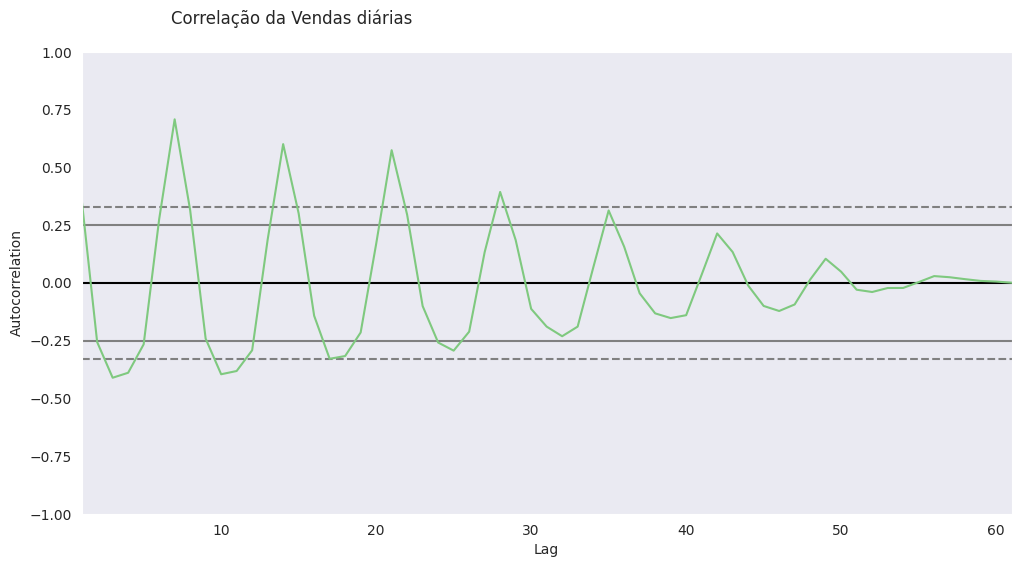

In [50]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Vendas diárias', fontsize = 12, x= .3, y= .95)
autocorrelation_plot(vendas_por_dia['vendas']);

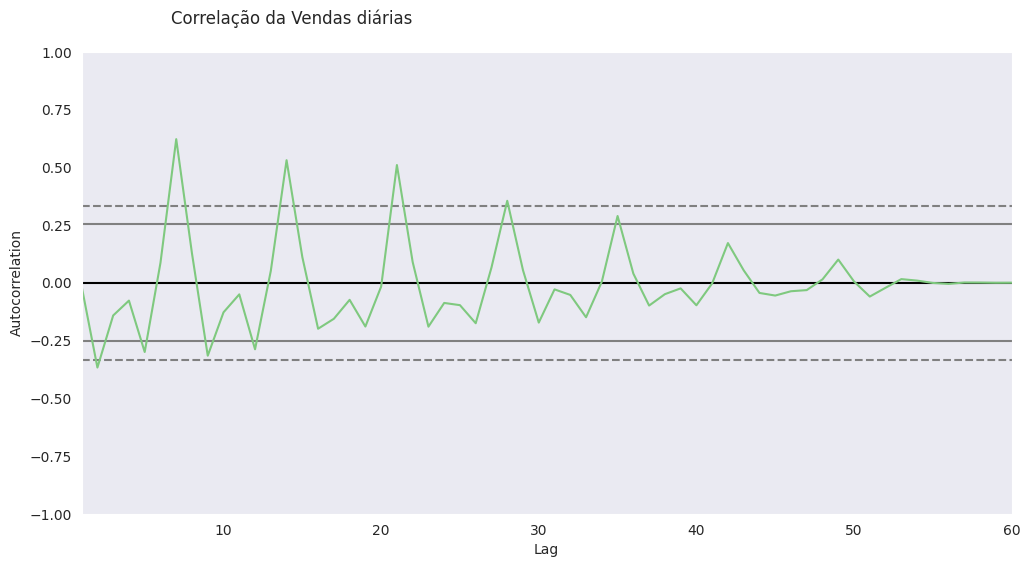

In [51]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Vendas diárias', fontsize = 12, x= .3, y= .95)
autocorrelation_plot(vendas_por_dia['aumento'][1:]);

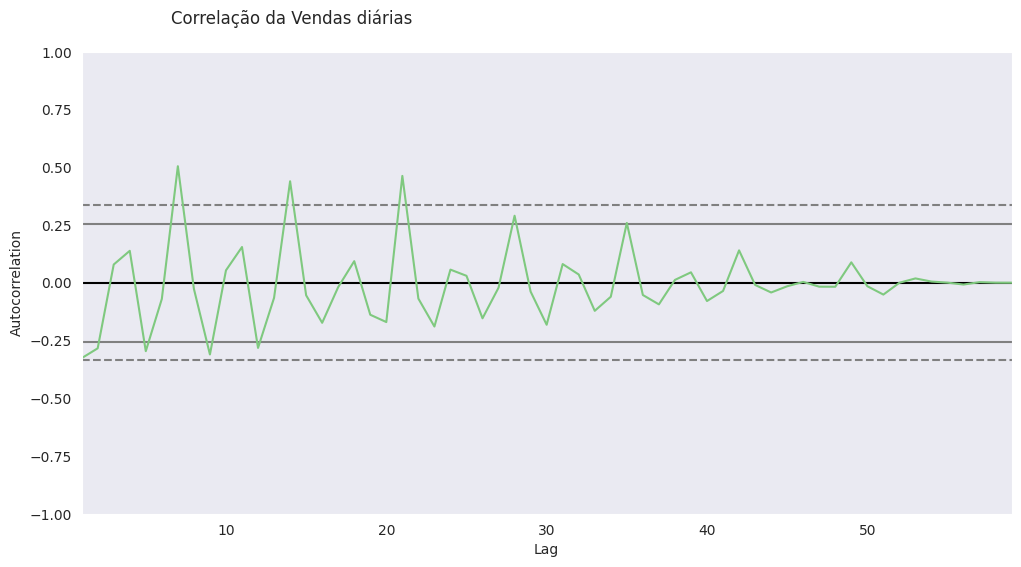

In [52]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Vendas diárias', fontsize = 12, x= .3, y= .95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:]);

## **Normalização**

In [53]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [54]:
# Verificando Tipo de Dados e existencia de Nulos
cafelura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [55]:
# Convertendo mes para tipo data
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [56]:
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura.head(2)

,mes,vendas,aumento
0,2017-01-31,880,NaN
1,2017-02-28,1600,720.0


In [57]:
cafelura['aceleracao'] = cafelura['aumento'].diff()
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


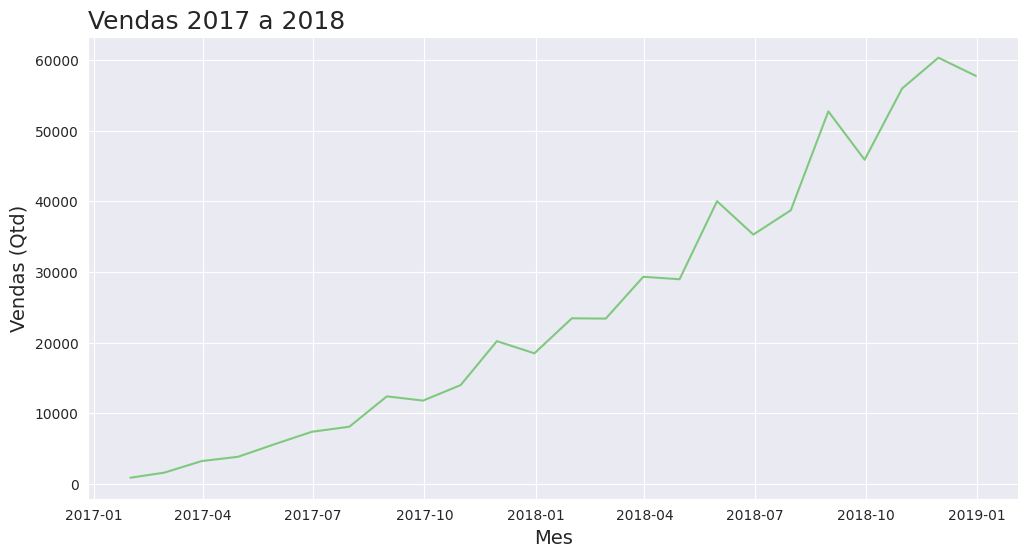

In [58]:
# def plotar(x, y, dataset, titulo, titulo_x, titulo_y):
plotar('mes', 'vendas', cafelura, 'Vendas 2017 a 2018', 'Mes', 'Vendas (Qtd)')

In [59]:
finais_semana = pd.read_csv('dias_final_de_semana.csv')
finais_semana.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [60]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / finais_semana['quantidade_de_dias'].values
cafelura.head(2)

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0


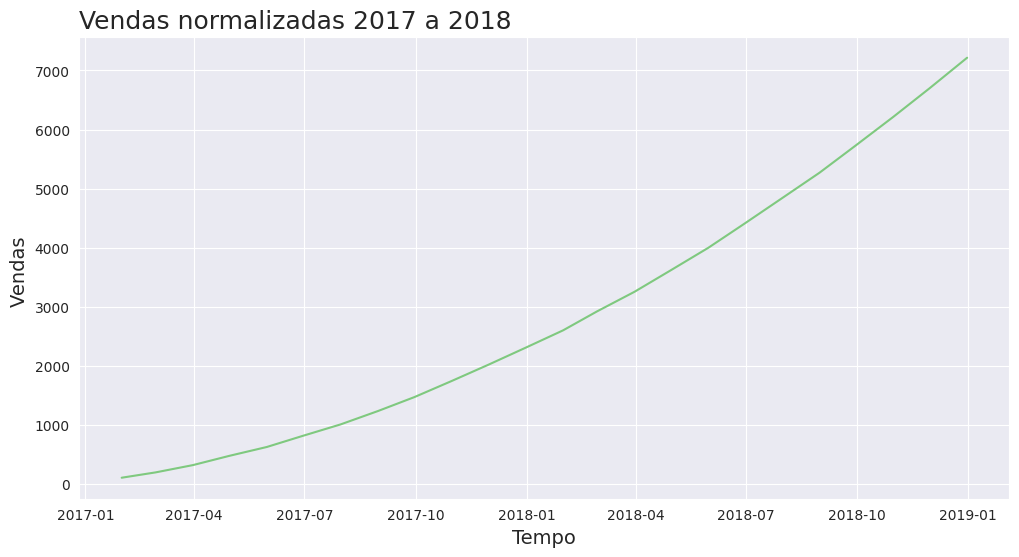

In [61]:
# def plotar(x, y, dataset, titulo, titulo_x, titulo_y):
plotar('mes', 'vendas_normalizadas', cafelura, 'Vendas normalizadas 2017 a 2018', 'Tempo', 'Vendas ' )

## **Statsmodel**

Aqui a coisa já fica bem mais fácil porque a biblioteca já traz muita coisa pronta para análise de série temporal


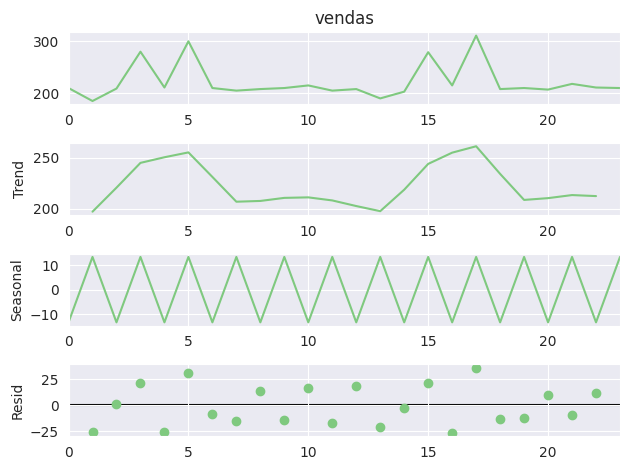

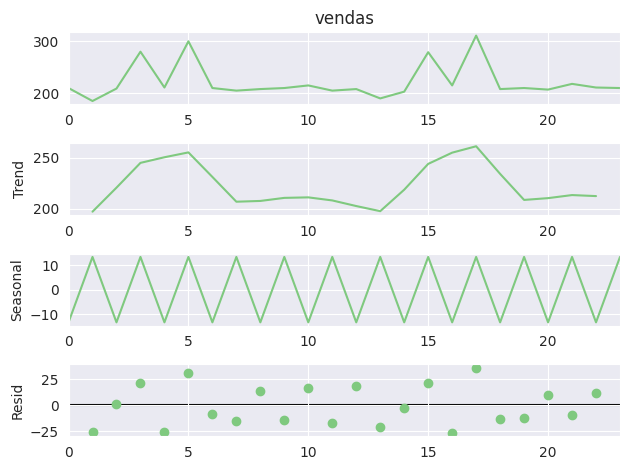

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

dados = chocolura['vendas']

resultado = seasonal_decompose(dados, period= 2)
resultado.plot()


## **Dados Alucel**

In [63]:
alucel = pd.read_csv('alucel.csv')
alucel.head(2)

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69


In [64]:
# Veriricando existencia de dados Nulos
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [65]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dia     61 non-null     datetime64[ns]
 1   vendas  61 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.1 KB


In [66]:
# Caluclar o aumento das Vendas
alucel['aumento'] = alucel['vendas'].diff()
alucel.head(2)

,dia,vendas,aumento
0,2018-10-01,1374.83,NaN
1,2018-10-02,2185.69,810.86


In [68]:
# Calculando aceleração
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head(2)

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN


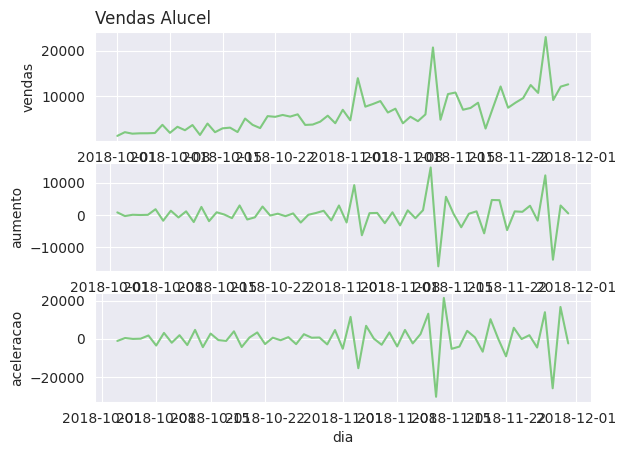

In [69]:
#def plot_comparacao(x, y1, y2, y3, dataset, titulo):
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Vendas Alucel')